<center> <h1> Text Analytics Decision Support System </h1> </center>
<center> <h2>  Bag of Words Method</h2> </center>

<a id="Introduction"></a>
# Introduction
-   Text Analytics Decision Support System using Bag of Words Method


<a id="task"></a>
### Task
    Learn Input-Ouput Function
    Given a text as an input and predict sentiment label(output)
    
<a id="goal"></a>    
### Goal:
    To learn from input to predict output

<a id="input-output"></a>
### Input-Output: 
#### Input: 
    Comment (text only) 
#### Output:
    Label of the text 
        1. Positive (1)
        3. Negative (-1)
    
<a id="phases"></a>
# Phases of Machine Learning:

**Training:**
- Learning phase.
   - Subset of data (Train data) is used to train model.
   
**Testing:**
- Subset of data is used to evaluate\test trained model.

**Application:**
- Learned \Trained model is used in real world applications.
    - Predictions are made on the real world data. 


<a id="stepbystep"></a>
# Step by step Implementation:

<a id="step-1"></a>
## Import the required libraries

In [1]:
import re
import string
import scipy
import pickle
import os,glob
import pandas as pd
import numpy as np
import seaborn as sns
import warnings 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.feature_extraction.text import *
from sklearn.preprocessing import LabelEncoder

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


import matplotlib.pyplot as plt
from prettytable import PrettyTable
from joblib import dump, load
from astropy.table import Table, Column
from sklearn.utils import shuffle

warnings.filterwarnings("ignore")

# Read & Understand Data

CSV files are normally created by programs that handle large amounts of data. They are a convenient way to export data from spreadsheets and databases as well as import or use it in other programs. For example, you might export the results of a data mining program to a CSV file and then import that into a spreadsheet to analyze the data, generate graphs for a presentation, or prepare a report for publication. 

CSV files are very easy to work with programmatically. Any language that supports text file input and string manipulation (like Python) can work with CSV files directly.

### Read Training Data

In [2]:
''' 
    /*-------------------- LOAD_TRAINING_DATA ----------------
    | Function  : read_csv()
    | Purpose   : Read a Dataset in CSV file Format 
    | Arguments : 
    |       path    : Path to dataset file
    |       dataset : Dataset file name
    | Return    :
    |       dataset : Dataset in DataFrame Format
    *---------------------------------------------------------*/
'''

# Read the Data in CSV Format
training_data = pd.read_csv('stock_data.csv')
training_data = pd.DataFrame(training_data)
#Load the Training Data
print("Training Data:")
print("=============\n")
training_data.head()

Training Data:



,Text,Sentiment
0,Kickers on my watchlist XIDE TIT SOQ PNK CPW B...,1
1,user: AAP MOVIE. 55% return for the FEA/GEED i...,1
2,user I'd be afraid to short AMZN - they are lo...,1
3,MNTA Over 12.00,1
4,OI Over 21.37,1


### Understand Training Data

In [3]:
print("\n\nAttributes Names in Train Dataset:")
print("==================================\n")

print(training_data.columns)

print("\n\nNumber of instances in Train Dataset:")
print("====================================\n")

total_training_data_instances= len(training_data.index)
print("Total Train Data instances:",total_training_data_instances)



Attributes Names in Train Dataset:

Index(['Text', 'Sentiment'], dtype='object')


Number of instances in Train Dataset:

Total Train Data instances: 5791


In [4]:
training_data.describe()

,Sentiment
count,5791.000000
mean,0.272664
std,0.962192
min,-1.000000
25%,-1.000000
50%,1.000000
75%,1.000000
max,1.000000



Number of instances and Classes in Training Dataset:



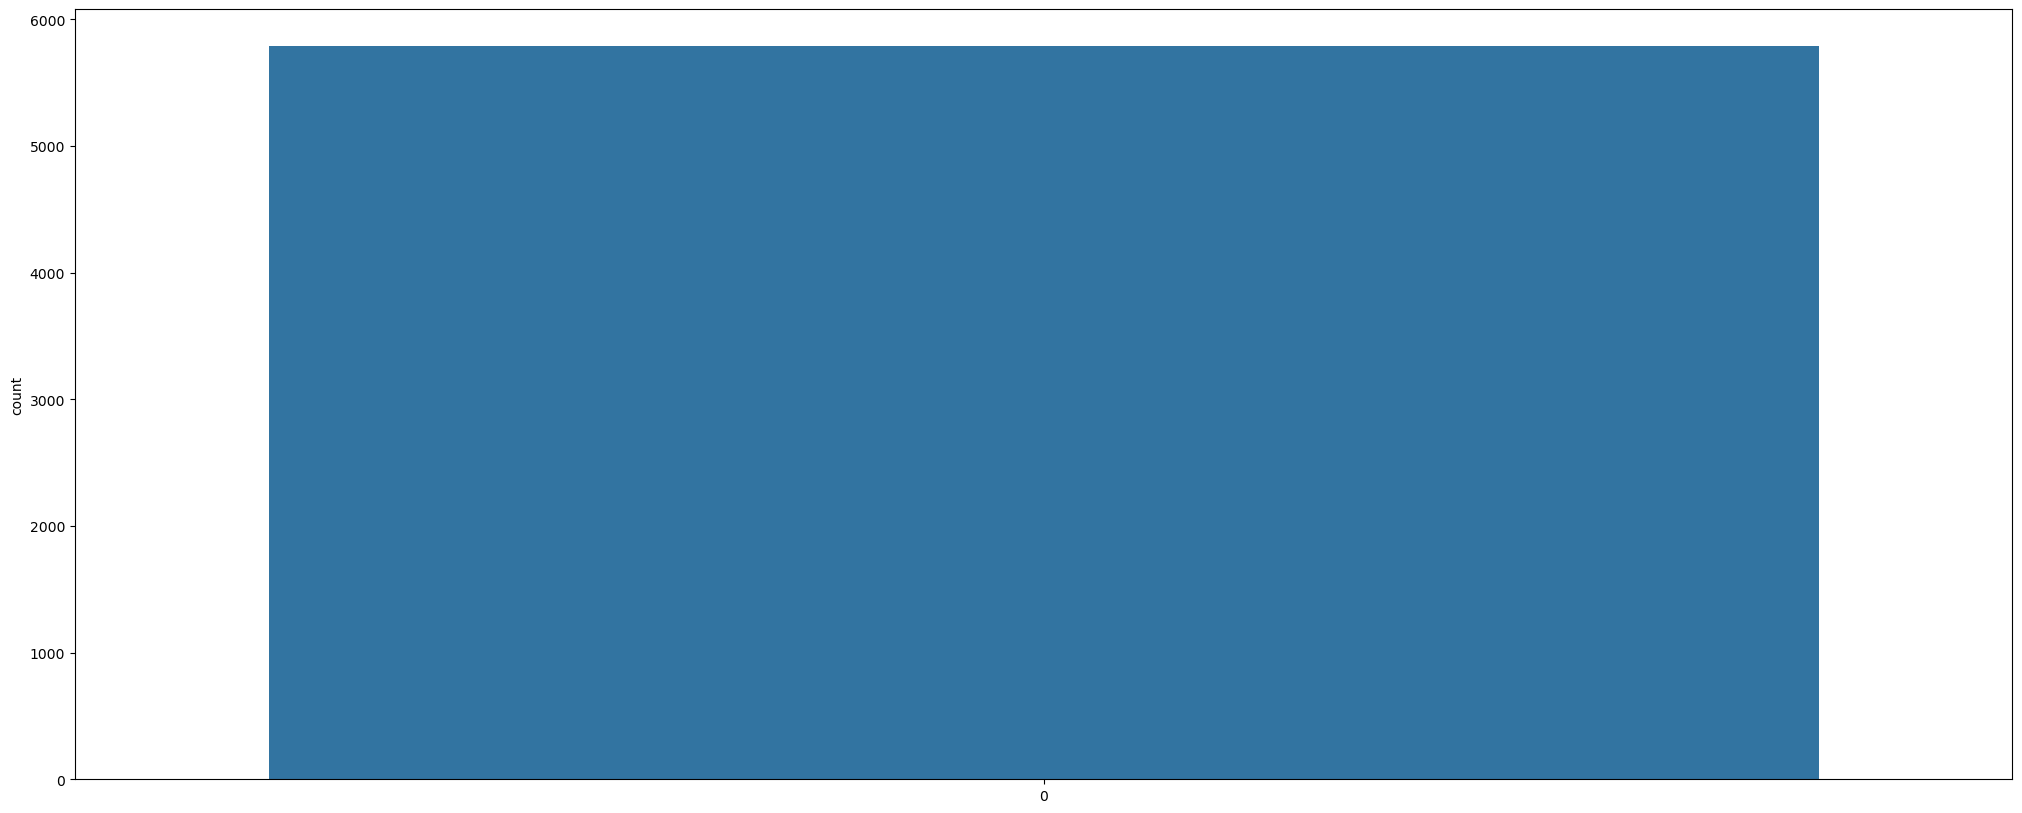

In [5]:
print("\nNumber of instances and Classes in Training Dataset:")
print("======================================================\n")
# Set the figure size
plt.figure(figsize=(25, 10))

sns.countplot(training_data["Sentiment"])

# Display the plot
plt.show()

# Text Preprocessing

Natural Language Processing (NLP) is a branch of Data Science which deals with Text data. Apart from numerical data, Text data is available to a great extent which is used to analyze and solve business problems. But before using the data for analysis or prediction, processing the data is important.

To prepare the text data for the model building we perform text preprocessing. It is the very first step of NLP projects. Some of the preprocessing steps are:

    Removal of duplicate data
    Removal of irrelevant data
    Removing punctuations 
    Removing URLs
    Removing Stop words
    Conversion to lowercase
    Remove Hash Tages
    Replace Emojis
    Lower casing
    Tokenization
    Stemming
    Lemmatization

RegEx was used for data preprocessing, A RegEx, or Regular Expression, is a sequence of characters that forms a search pattern. RegEx can be used to check if a string contains the specified search pattern.

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ty\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:

''' 
    /*------------------------PRE-PROCESSING-TESTING-DATA -------------
    | Function  : lower() & re.sub()
    | Purpose   : Perform following preprocessing:
    |              • Lower case
    |              • Remove Punctuation marks
    |              • Stopwords Removal
    | Arguments : 
    |       text: Text to be pre-processed
    | Return    :
    |       text: Pre-processed text
    *-----------------------------------------------------------------*/
'''


def data_preprocessing(text):
    
    # Remove all URLs
    text = re.sub(r'http\S+', '', text)

    # Remove all names starting with @
    text = re.sub(r'@\w+', '', text)

    # Remove all hashtags
    text = re.sub(r'#\w+', '', text)

    # Remove all numeric digits
    text = re.sub(r'\d+', '', text)

    # Remove all punctuation marks
    text = text.translate(str.maketrans('', '', string.punctuation))

        # remove all non-alphabetic characters
    text = re.sub(r'[^a-zA-Z]+', ' ', text)

    # regular expression matches any string that starts with $
    text = re.sub(r'\$\w+\s*', '', text)

    # regular expression matches any string that starts with Contract: 0x (Contract: 0x) 
    text = re.sub(r'Contract: 0x\w+\s*', '', text)

    #regular expression matches one or more whitespace characters (\s+) and replaces them with a single space (' ')
    text = re.sub(r'\s+', ' ', text)

    # convert the text to lower case
    text = text.lower()

    # Remove all English Stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word.lower() not in stop_words)

        
    return text

### Text Preprocessing of Training Data

In [8]:
# Apply the Preprocessing on Input Data Comments of Training Data
training_data['Text'] = training_data['Text'].apply(data_preprocessing)
preprocessed_training_data = training_data

print("\nTraining Data After Pre-processing:")
print("====================================\n")
preprocessed_training_data.head(3)


Training Data After Pre-processing:



,Text,Sentiment
0,kickers watchlist xide tit soq pnk cpw bpz aj ...,1
1,user aap movie return feageed indicator trades...,1
2,user id afraid short amzn looking like nearmon...,1


## Shape of the Training Data

In [9]:
preprocessed_training_data.shape

(5791, 2)

## Data Analysis

## Tokenization

Tokenization is used in natural language processing to split paragraphs and sentences into smaller units that can be more easily assigned meaning. The first step of the NLP process is gathering the data (a sentence) and breaking it into understandable parts (words).

### Tokenization of Training Data

The tokenization of of words is performed and then the length of each word is measured.

In [10]:
from nltk.tokenize import word_tokenize
#Tokenize the Training Dataset
Tokens = preprocessed_training_data['Text'].apply(word_tokenize)
Tokens = Tokens.to_frame()
label_df=pd.DataFrame(preprocessed_training_data["Sentiment"])
Tokens=Tokens.join(label_df)
Tokens['Token_Length'] = preprocessed_training_data['Text'].str.split().apply(lambda x : [len(i) for i in x])
print("\nTraining Data After Tokenization :")
print("=================================\n")
Tokens.head(3)


Training Data After Tokenization :



,Text,Sentiment,Token_Length
0,"[kickers, watchlist, xide, tit, soq, pnk, cpw,...",1,"[7, 9, 4, 3, 3, 3, 3, 3, 2, 5, 6, 6, 3, 4, 5]"
1,"[user, aap, movie, return, feageed, indicator,...",1,"[4, 3, 5, 6, 7, 9, 6, 4, 7]"
2,"[user, id, afraid, short, amzn, looking, like,...",1,"[4, 2, 6, 5, 4, 7, 4, 12, 6, 24]"


### More Data Analysis of Training Data

#### Text Length and Word Count

Let’s start the analysis by adding some more features to the dataset. Here, I am adding the length of the each text and the word count of each text. First, I’ll take a look at the number of characters present in each sentence. This can give us a rough idea about the text length. And further total number of words included in each sentence is also counted

In [11]:
preprocessed_training_data['Tweet length'] = preprocessed_training_data['Text'].astype(str).apply(len)
preprocessed_training_data['word_count'] = preprocessed_training_data['Text'].apply(lambda x: len(str(x).split()))
preprocessed_training_data.head(3)

,Text,Sentiment,Tweet length,word_count
0,kickers watchlist xide tit soq pnk cpw bpz aj ...,1,80,15
1,user aap movie return feageed indicator trades...,1,59,9
2,user id afraid short amzn looking like nearmon...,1,83,10


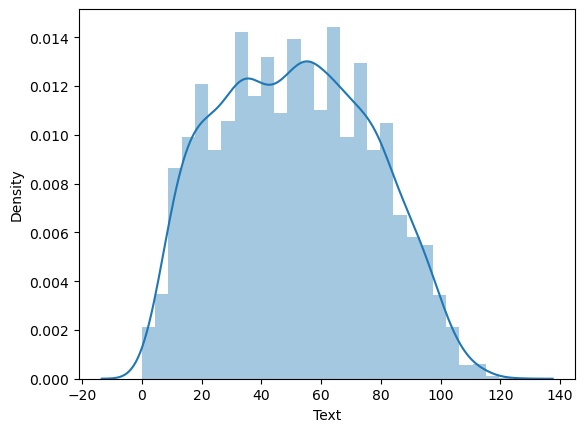

In [12]:
import seaborn as sns
text_length=preprocessed_training_data['Text'].str.len()
sns.distplot(text_length)
plt.show()

## WordCloud of Data

A word cloud is a simple yet powerful visual representation object for text processing, which shows the most frequent word with bigger and bolder letters, and with different colors. The smaller the the size of the word the lesser it’s important.It is a visualization technique for text data wherein each word is picturised with its importance in the context or its frequency. Reference is given below: https://www.analyticsvidhya.com/blog/2020/10/word-cloud-or-tag-cloud-in-python/

### WordCloud of Training Data

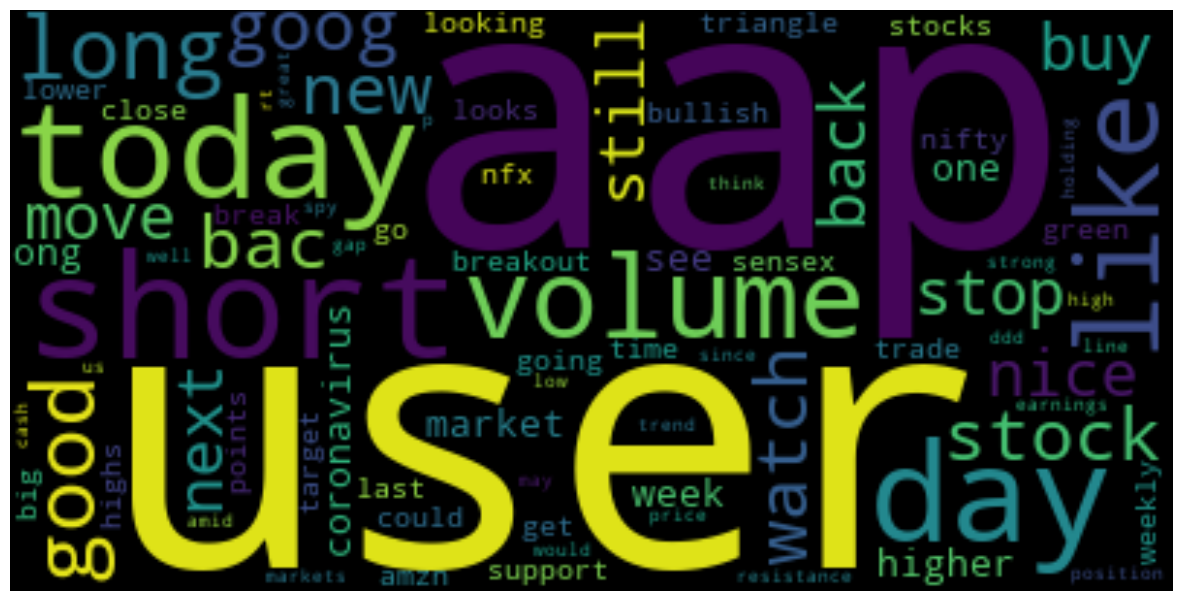

In [13]:
from wordcloud import WordCloud
text = ' '.join(preprocessed_training_data['Text'])

# Calculate word frequency, count each word only once
word_freq = preprocessed_training_data['Text'].str.split(expand=True).stack().value_counts().apply(lambda x: 1)

wordcloud = WordCloud(max_words=80, contour_width=3).generate_from_frequencies(word_freq)


plt.figure(figsize = (15, 9))
# Display the generated image:
plt.imshow(wordcloud, interpolation= "bilinear")
plt.axis("off")
plt.show()

## Ngram exploration

This is common practice in text data analysis to make charts of the frequency of words. That gives a good idea about what people are talking about most in this text. First, find the frequency of each word in the text column of the dataset. Then plot the top 20 words based on the frequency.

In [14]:
def get_top_n_words(corpus, n=None):
    vec=CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_words(preprocessed_training_data['Text'], 20)
df1 = pd.DataFrame(common_words, columns = ['Text', 'count'])
df1

,Text,count
0,aap,919
1,user,642
2,short,436
3,today,317
4,day,301
5,volume,296
6,like,278
7,long,254
8,good,227
9,stock,221


Here is the bar plot of the frequency of the top 20 words:

<Axes: title={'center': 'Bar Chart of Top Words Frequency'}, xlabel='Top Words', ylabel='Count'>

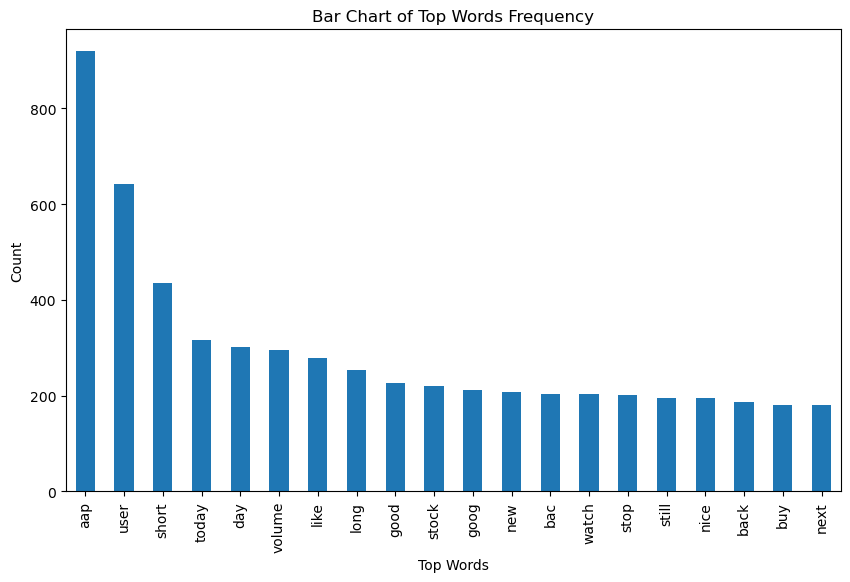

In [15]:
df1.groupby('Text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar',
    figsize=(10, 6),
    xlabel = "Top Words",
    ylabel = "Count",
    title = "Bar Chart of Top Words Frequency"
)

# Method 1: Feature Extraction using Bag-of-Words Method (Converting Input to Numerical Representation)

In Natural Language Processing, Feature Extraction is one of the most important steps to be followed for a better understanding of the context of what we are dealing with. After the initial text is cleaned, we need to transform it into its features to be used for modeling.

    Bag of words is a Natural Language Processing technique of text modelling. In technical terms, we can say that it is a method of feature extraction with text data. This approach is a simple and flexible way of extracting features from documents.

    A bag of words is a representation of text that describes the occurrence of words within a document. We just keep track of word counts and disregard the grammatical details and the word order. It is called a “bag” of words because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

https://www.mygreatlearning.com/blog/bag-of-words/

### Train Count Vectorizer on Training Data

CountVectorizer is used to convert a collection of text documents to a vector of term/token counts. It also enables the ​pre-processing of text data prior to generating the vector representation. This functionality makes it a highly flexible feature representation module for text.

In [16]:
''' 
    /*----------------------------- FEATURE_EXTRACTION ----------------
    | Function  : CountVectorizer()
    | Purpose   : Transform Input (Text) into Numerical Representation 
    | Arguments : 
    |       Text: Input Text
    | Return    :
    |   Features: Numerical Representation
    *-----------------------------------------------------------------*/
'''

# Initialize the Count Vectorizer 
count_vectorizer = CountVectorizer(
        analyzer = 'word',    # Word n-grams Generation
        strip_accents='unicode',
        token_pattern = r'\w{2,}',  #vectorize 2-character words or more
        ngram_range = (1,1),  # Word bi-grams Feeatures
        max_features = 5000) # Extract 5000 Features 
train_text = preprocessed_training_data['Text']

# Fit the Tfidf Vectorizer on Input Text of Training Data
count_vectorizer = count_vectorizer.fit(train_text)


### Save the Trained Count Vectorizer

In [17]:
''' 
    /*----------------- SAVE_THE_TRAINED_COUNT_VECTORIZER -------------------
    | Function  : dump()
    | Purpose   : Save the Trained Vectorizer on your Hard Disk
    | Arguments : 
    |    Model   : Model Objects
    | Return    :
    |    File    : Trained Vectorizer will be Saved on Hard Disk
    *-----------------------------------------------------------------------*/
'''

# Save the Trained Tfidf Vectorizer in Pkl File
pickle.dump(count_vectorizer, open('vectorizer_word_unigram.pkl', 'wb'))

## Convert Input of Training Data into Feature Vectors

In [18]:
# Transform the Input Text of Training Data using Trained Tfidf Vectorizer
train_feature_vectors = count_vectorizer.transform(train_text)
train_feature_vectors = train_feature_vectors.todense()

# Get the name of Features (Feature  Set) and create a DataFrame of Input Features
input_training_features = pd.DataFrame(train_feature_vectors, columns = count_vectorizer.get_feature_names_out())
input_training_features = input_training_features.round(2)

# Display the Document Feature Matrix of Training Data
print("\nDocument Features Matrix of Training Data :")
print("============================================\n")
#input_training_features = input_training_features.round(2)
input_training_features.head()


Document Features Matrix of Training Data :



,aa,aap,aapl,aaps,abbott,abcd,able,absent,absolutely,abt,...,znf,znga,zone,zonetime,zoom,zoombombing,zot,zqk,zte,zynga
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Splitting Input vectors and labels

In machine learning, classification problems involve training a model to apply labels to, or classify, the input values and sort your dataset into categories.

### Splitting Input vectors and labels of Training Data

In [19]:
''' 
    /*------------- SPLITTING_TRAINING_DATA_OUTPUTS/LABELS -------------
'''

# Split the Training Data Outputs / Labels and Create a DataFrame

training_data_output = pd.DataFrame(preprocessed_training_data.iloc[: , 1])

# Output Label Gender of Training Data
print("\nOutput of Training Data:")
print("========================\n")
training_data_output.head()


Output of Training Data:



,Sentiment
0,1
1,1
2,1
3,1
4,1


In [20]:
from sklearn.model_selection import train_test_split

X = input_training_features
y = training_data_output

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=2020)

# Train Machine Learning Models using Training Data

In [21]:
y_test

,Sentiment
422,-1
3006,1
2150,-1
5088,-1
3768,1
...,...
2784,-1
4720,1
2903,1
1188,-1


## Random Forest Classifier

In [22]:
random_forest_classifier = RandomForestClassifier(n_estimators=5, random_state=0)
random_forest = random_forest_classifier.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(random_forest)

Parameters and their values:

RandomForestClassifier(n_estimators=5, random_state=0)


## Gradient Boosting Classifier

In [23]:
from sklearn.ensemble import GradientBoostingClassifier
gb_claasifier = GradientBoostingClassifier()
gb_claasifier = gb_claasifier.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(gb_claasifier)

Parameters and their values:

GradientBoostingClassifier()


## Linear SVC Classifier

In [24]:
linear_svc = LinearSVC()
linearsvc = linear_svc.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(linearsvc)

Parameters and their values:

LinearSVC()


## Naive Bayes Classifier 

In [25]:
bernoulli_nb = BernoulliNB()
ber_nb = bernoulli_nb.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(ber_nb)

Parameters and their values:

BernoulliNB()


## Multinomial Naive Bayes Classifier

In [26]:
from sklearn.naive_bayes import MultinomialNB
multi_nb = MultinomialNB()
multi_nb = multi_nb.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(multi_nb)

Parameters and their values:

MultinomialNB()


# Evaluate Machine Learning Algorithms 

## Random Forest Classifier

In [27]:
X_test

,aa,aap,aapl,aaps,abbott,abcd,able,absent,absolutely,abt,...,znf,znga,zone,zonetime,zoom,zoombombing,zot,zqk,zte,zynga
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2150,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3768,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2784,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4720,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2903,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1188,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [28]:
ran_for_predict=random_forest_classifier.predict(X_test)
print("\n\nAccuracy Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_accuracy = round(accuracy_score(y_test,ran_for_predict),2)
print(ran_for_accuracy)

print("\n\nPrecision Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_pricision = round(precision_score(y_test,ran_for_predict,average='macro'),2)
print(ran_for_pricision)

print("\n\nRecall Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_recall = round(recall_score(y_test,ran_for_predict,average='micro'),2)
print(ran_for_recall)

print("\n\nF1 Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_f1 = round(f1_score(y_test,ran_for_predict,average='weighted'),2)
print(ran_for_f1)




Accuracy Score of Random Forest Classifier:

0.74


Precision Score of Random Forest Classifier:

0.72


Recall Score of Random Forest Classifier:

0.74


F1 Score of Random Forest Classifier:

0.74


In [29]:
print(classification_report(y_test, ran_for_predict))

              precision    recall  f1-score   support

          -1       0.66      0.61      0.64       430
           1       0.78      0.81      0.80       729

    accuracy                           0.74      1159
   macro avg       0.72      0.71      0.72      1159
weighted avg       0.74      0.74      0.74      1159



## Gradient Boosting Classifier

In [30]:
log_reg_predict=gb_claasifier.predict(X_test)

print("\n\nAccuracy Score of gb_claasifier:")
print("=====================================\n")

log_reg_accuracy = round(accuracy_score(y_test,log_reg_predict),2)
print(log_reg_accuracy)

print("\nprecision Score of gb_claasifier:")
print("=====================================\n")

log_reg_pre = round(precision_score(y_test,log_reg_predict,average='macro'),2)
print(log_reg_pre)

print("\n\nRecall Score of gb_claasifier:")
print("=====================================\n")

log_reg_recal = round(recall_score(y_test,log_reg_predict,average='micro'),2)
print(log_reg_recal)

print("\n\nF1 Score of gb_claasifier:")
print("=====================================\n")

log_reg_f1 = round(f1_score(y_test,log_reg_predict,average='weighted'),2)
print(log_reg_f1)



Accuracy Score of gb_claasifier:

0.73

precision Score of gb_claasifier:

0.77


Recall Score of gb_claasifier:

0.73


F1 Score of gb_claasifier:

0.7


In [31]:
print(classification_report(y_test, log_reg_predict))

              precision    recall  f1-score   support

          -1       0.82      0.36      0.50       430
           1       0.72      0.95      0.82       729

    accuracy                           0.73      1159
   macro avg       0.77      0.66      0.66      1159
weighted avg       0.75      0.73      0.70      1159



## BernoulliNB

In [32]:
bernoulli_nb_predict=bernoulli_nb.predict(X_test)
print("\n\nAccuracy Score of BernoulliNB:")
print("==================================\n")

bernouli_accuracy = round(accuracy_score(y_test,bernoulli_nb_predict),2)
print(bernouli_accuracy)

print("\n\nPrecision Score of BernoulliNB:")
print("==================================\n")

bernouli_pre = round(precision_score(y_test,bernoulli_nb_predict,average='macro'),2)
print(bernouli_pre)

print("\n\nRecall Score of BernoulliNB:")
print("==================================\n")

bernouli_recal = round(recall_score(y_test,bernoulli_nb_predict,average='micro'),2)
print(bernouli_recal)

print("\n\nF1 Score of BernoulliNB:")
print("==================================\n")

bernouli_f1 = round(f1_score(y_test,bernoulli_nb_predict,average='weighted'),2)
print(bernouli_f1)



Accuracy Score of BernoulliNB:

0.76


Precision Score of BernoulliNB:

0.75


Recall Score of BernoulliNB:

0.76


F1 Score of BernoulliNB:

0.75


In [33]:
print(classification_report(y_test, bernoulli_nb_predict))

              precision    recall  f1-score   support

          -1       0.71      0.59      0.64       430
           1       0.78      0.86      0.82       729

    accuracy                           0.76      1159
   macro avg       0.75      0.72      0.73      1159
weighted avg       0.75      0.76      0.75      1159



## Linear SVC

In [34]:
linear_svc_predict=linear_svc.predict(X_test)
print("\n\nAccuracy Score of LinearSVC:")
print("================================\n")

linear_svc_accuracy = round(accuracy_score(y_test,linear_svc_predict),2)
print(linear_svc_accuracy)

print("\nprecision Score of LinearSVC:")
print("================================\n")

linear_svc_pre = round(precision_score(y_test,linear_svc_predict,average='macro'),2)
print(linear_svc_pre)

print("\n\nRecall Score of LinearSVC:")
print("================================\n")

linear_svc_recal = round(recall_score(y_test,linear_svc_predict,average='micro'),2)
print(linear_svc_recal)

print("\n\nF1 Score of LinearSVC:")
print("================================\n")

linear_svc_f1 = round(f1_score(y_test,linear_svc_predict,average='weighted'),2)
print(linear_svc_f1)




Accuracy Score of LinearSVC:

0.76

precision Score of LinearSVC:

0.75


Recall Score of LinearSVC:

0.76


F1 Score of LinearSVC:

0.76


In [35]:
print(classification_report(y_test, linear_svc_predict))

              precision    recall  f1-score   support

          -1       0.69      0.64      0.67       430
           1       0.80      0.83      0.81       729

    accuracy                           0.76      1159
   macro avg       0.75      0.74      0.74      1159
weighted avg       0.76      0.76      0.76      1159



# MultinomialNB

In [36]:
multi_nb_predict=multi_nb.predict(X_test)
print("\n\nAccuracy Score of MultinomialNB:")
print("================================\n")

multi_nb_accuracy = round(accuracy_score(y_test,multi_nb_predict),2)
print(multi_nb_accuracy)

print("\nprecision Score of MultinomialNB:")
print("================================\n")

multi_nb_pre = round(precision_score(y_test,multi_nb_predict,average='macro'),2)
print(multi_nb_pre)

print("\n\nRecall Score of MultinomialNB:")
print("================================\n")

multi_nb_recal = round(recall_score(y_test,multi_nb_predict,average='micro'),2)
print(multi_nb_recal)

print("\n\nF1 Score of MultinomialNB:")
print("================================\n")

multi_nb_f1 = round(f1_score(y_test,multi_nb_predict,average='weighted'),2)
print(multi_nb_f1)




Accuracy Score of MultinomialNB:

0.77

precision Score of MultinomialNB:

0.75


Recall Score of MultinomialNB:

0.77


F1 Score of MultinomialNB:

0.76


In [37]:
print(classification_report(y_test, multi_nb_predict))

              precision    recall  f1-score   support

          -1       0.70      0.65      0.67       430
           1       0.80      0.83      0.82       729

    accuracy                           0.77      1159
   macro avg       0.75      0.74      0.75      1159
weighted avg       0.76      0.77      0.76      1159



# Selection of Best Model

In [38]:
pretty_table = PrettyTable(['Model', 'Accuracy','Precision', 'Recall','F1_score'])
pretty_table.add_row(['RandomForestClassifier', ran_for_accuracy,ran_for_pricision,ran_for_recall,ran_for_f1])
pretty_table.add_row(['GradientBoostingClassifier', log_reg_accuracy,log_reg_pre,log_reg_recal,log_reg_f1])
pretty_table.add_row(['BernoulliNB', bernouli_accuracy,bernouli_pre,bernouli_recal,bernouli_f1])
pretty_table.add_row(['LinearSVC', linear_svc_accuracy,linear_svc_pre,linear_svc_recal,linear_svc_f1])
pretty_table.add_row(['MultinomialNB', multi_nb_accuracy,multi_nb_pre,multi_nb_recal,multi_nb_f1])
print("\n\nDetailed Performance of all the models:")
print("=======================================\n")
print(pretty_table)

maximum_accuracy=max([ran_for_accuracy,log_reg_accuracy,bernouli_accuracy,linear_svc_accuracy, multi_nb_accuracy])


pretty_table_best=PrettyTable(['Model', 'Accuracy','Precision','Recall','f1_score'])

if ran_for_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Random Forest Classifier',ran_for_accuracy,ran_for_pricision,ran_for_recall,ran_for_f1])
    
elif log_reg_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['GradientBoostingClassifier',log_reg_accuracy,log_reg_pre,log_reg_recal,log_reg_f1])
    
elif bernouli_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['BernoulliNB',bernouli_accuracy,bernouli_pre,bernouli_recal,bernouli_f1])
    
elif linear_svc_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['LinearSVC',linear_svc_accuracy,linear_svc_pre,linear_svc_recal,linear_svc_f1])
    
elif multi_nb_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['MultinomialNB',multi_nb_accuracy,multi_nb_pre,multi_nb_recal,multi_nb_f1])
    
print("\n\nBest Model:")
print("===========\n")
print(pretty_table_best)




Detailed Performance of all the models:

+----------------------------+----------+-----------+--------+----------+
|           Model            | Accuracy | Precision | Recall | F1_score |
+----------------------------+----------+-----------+--------+----------+
|   RandomForestClassifier   |   0.74   |    0.72   |  0.74  |   0.74   |
| GradientBoostingClassifier |   0.73   |    0.77   |  0.73  |   0.7    |
|        BernoulliNB         |   0.76   |    0.75   |  0.76  |   0.75   |
|         LinearSVC          |   0.76   |    0.75   |  0.76  |   0.76   |
|       MultinomialNB        |   0.77   |    0.75   |  0.77  |   0.76   |
+----------------------------+----------+-----------+--------+----------+


Best Model:

+---------------+----------+-----------+--------+----------+
|     Model     | Accuracy | Precision | Recall | f1_score |
+---------------+----------+-----------+--------+----------+
| MultinomialNB |   0.77   |    0.75   |  0.77  |   0.76   |
+---------------+----------+----

# Method 2: Feature Extraction using Term Frequency-Inverse Document Frequency (TF-IDF) Method (Converting Input to Numerical Representation)

In Natural Language Processing, Feature Extraction is one of the most important steps to be followed for a better understanding of the context of what we are dealing with. After the initial text is cleaned, we need to transform it into its features to be used for modeling.

    Term Frequency-Inverse Document Frequency (TF-IDF) is a widely used technique in natural language processing (NLP) that evaluates the significance of words within a document relative to their occurrence across a collection of documents. TF-IDF measures are utilized to represent words in a numerical format, making them suitable for various text analysis tasks, including sentiment analysis and trend identification in financial data.


In [39]:
''' 
    /*----------------------------- FEATURE_EXTRACTION ----------------
    | Function  : TFIDFVectorizer()
    | Purpose   : Transform Input (Text) into Numerical Representation 
    | Arguments : 
    |       Text: Input Text
    | Return    :
    |   Features: Numerical Representation
    *-----------------------------------------------------------------*/
'''

# Initialize the TFIDF Vectorizer 
count_vectorizer = TfidfVectorizer(
        analyzer = 'word',    # Word n-grams Generation
        strip_accents='unicode',
        token_pattern = r'\w{2,}',  #vectorize 2-character words or more
        ngram_range = (1,1),  # Word bi-grams Feeatures
        max_features = 3000) # Extract 5000 Features 
train_text = preprocessed_training_data['Text']

# Fit the Tfidf Vectorizer on Input Text of Training Data
count_vectorizer = count_vectorizer.fit(train_text)


In [40]:
# Transform the Input Text of Training Data using Trained Tfidf Vectorizer
train_feature_vectors = count_vectorizer.transform(train_text)
train_feature_vectors = train_feature_vectors.todense()

# Get the name of Features (Feature  Set) and create a DataFrame of Input Features
input_training_features = pd.DataFrame(train_feature_vectors, columns = count_vectorizer.get_feature_names_out())
input_training_features = input_training_features.round(2)

# Display the Document Feature Matrix of Training Data
print("\nDocument Features Matrix of Training Data :")
print("============================================\n")
#input_training_features = input_training_features.round(2)
input_training_features.head()


Document Features Matrix of Training Data :



,aa,aap,aapl,aaps,abbott,abcd,able,absolutely,abt,abx,...,zero,zgnx,zillow,zion,ziop,znga,zone,zoom,zot,zynga
0,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [41]:
''' 
    /*------------- SPLITTING_TRAINING_DATA_OUTPUTS/LABELS -------------
'''

# Split the Training Data Outputs / Labels and Create a DataFrame

training_data_output = pd.DataFrame(preprocessed_training_data.iloc[: , 1])

# Output Label Gender of Training Data
print("\nOutput of Training Data:")
print("========================\n")
training_data_output.head()


Output of Training Data:



,Sentiment
0,1
1,1
2,1
3,1
4,1


In [42]:
from sklearn.model_selection import train_test_split

X = input_training_features
y = training_data_output

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=2020)

# Random Forest

In [43]:
random_forest_classifier = RandomForestClassifier(n_estimators=5, random_state=0)
random_forest = random_forest_classifier.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(random_forest)

Parameters and their values:

RandomForestClassifier(n_estimators=5, random_state=0)


In [44]:
ran_for_predict=random_forest_classifier.predict(X_test)
print("\n\nAccuracy Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_accuracy = round(accuracy_score(y_test,ran_for_predict),2)
print(ran_for_accuracy)

print("\n\nPrecision Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_pricision = round(precision_score(y_test,ran_for_predict,average='macro'),2)
print(ran_for_pricision)

print("\n\nRecall Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_recall = round(recall_score(y_test,ran_for_predict,average='micro'),2)
print(ran_for_recall)

print("\n\nF1 Score of Random Forest Classifier:")
print("===========================================\n")

ran_for_f1 = round(f1_score(y_test,ran_for_predict,average='weighted'),2)
print(ran_for_f1)




Accuracy Score of Random Forest Classifier:

0.75


Precision Score of Random Forest Classifier:

0.73


Recall Score of Random Forest Classifier:

0.75


F1 Score of Random Forest Classifier:

0.75


In [45]:
print(classification_report(y_test, ran_for_predict))

              precision    recall  f1-score   support

          -1       0.67      0.64      0.65       430
           1       0.79      0.81      0.80       729

    accuracy                           0.75      1159
   macro avg       0.73      0.73      0.73      1159
weighted avg       0.75      0.75      0.75      1159



# Gradient Boosting

In [46]:
from sklearn.ensemble import GradientBoostingClassifier
gb_claasifier = GradientBoostingClassifier()
gb_claasifier = gb_claasifier.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(gb_claasifier)

Parameters and their values:

GradientBoostingClassifier()


In [47]:
log_reg_predict=gb_claasifier.predict(X_test)

print("\n\nAccuracy Score of gb_claasifier:")
print("=====================================\n")

log_reg_accuracy = round(accuracy_score(y_test,log_reg_predict),2)
print(log_reg_accuracy)

print("\nprecision Score of gb_claasifier:")
print("=====================================\n")

log_reg_pre = round(precision_score(y_test,log_reg_predict,average='macro'),2)
print(log_reg_pre)

print("\n\nRecall Score of gb_claasifier:")
print("=====================================\n")

log_reg_recal = round(recall_score(y_test,log_reg_predict,average='micro'),2)
print(log_reg_recal)

print("\n\nF1 Score of gb_claasifier:")
print("=====================================\n")

log_reg_f1 = round(f1_score(y_test,log_reg_predict,average='weighted'),2)
print(log_reg_f1)



Accuracy Score of gb_claasifier:

0.73

precision Score of gb_claasifier:

0.75


Recall Score of gb_claasifier:

0.73


F1 Score of gb_claasifier:

0.7


In [48]:
print(classification_report(y_test, log_reg_predict))

              precision    recall  f1-score   support

          -1       0.78      0.37      0.50       430
           1       0.72      0.94      0.81       729

    accuracy                           0.73      1159
   macro avg       0.75      0.65      0.65      1159
weighted avg       0.74      0.73      0.70      1159



# Linear SVC

In [49]:
linear_svc = LinearSVC()
linearsvc = linear_svc.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(linearsvc)

Parameters and their values:

LinearSVC()


In [50]:
linear_svc_predict=linear_svc.predict(X_test)
print("\n\nAccuracy Score of LinearSVC:")
print("================================\n")

linear_svc_accuracy = round(accuracy_score(y_test,linear_svc_predict),2)
print(linear_svc_accuracy)

print("\nprecision Score of LinearSVC:")
print("================================\n")

linear_svc_pre = round(precision_score(y_test,linear_svc_predict,average='macro'),2)
print(linear_svc_pre)

print("\n\nRecall Score of LinearSVC:")
print("================================\n")

linear_svc_recal = round(recall_score(y_test,linear_svc_predict,average='micro'),2)
print(linear_svc_recal)

print("\n\nF1 Score of LinearSVC:")
print("================================\n")

linear_svc_f1 = round(f1_score(y_test,linear_svc_predict,average='weighted'),2)
print(linear_svc_f1)




Accuracy Score of LinearSVC:

0.78

precision Score of LinearSVC:

0.77


Recall Score of LinearSVC:

0.78


F1 Score of LinearSVC:

0.78


In [51]:
print(classification_report(y_test, linear_svc_predict))

              precision    recall  f1-score   support

          -1       0.74      0.63      0.68       430
           1       0.80      0.87      0.83       729

    accuracy                           0.78      1159
   macro avg       0.77      0.75      0.76      1159
weighted avg       0.78      0.78      0.78      1159



# BernoulliNB

In [52]:
bernoulli_nb = BernoulliNB()
ber_nb = bernoulli_nb.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(ber_nb)

Parameters and their values:

BernoulliNB()


In [53]:
bernoulli_nb_predict=bernoulli_nb.predict(X_test)
print("\n\nAccuracy Score of BernoulliNB:")
print("==================================\n")

bernouli_accuracy = round(accuracy_score(y_test,bernoulli_nb_predict),2)
print(bernouli_accuracy)

print("\n\nPrecision Score of BernoulliNB:")
print("==================================\n")

bernouli_pre = round(precision_score(y_test,bernoulli_nb_predict,average='macro'),2)
print(bernouli_pre)

print("\n\nRecall Score of BernoulliNB:")
print("==================================\n")

bernouli_recal = round(recall_score(y_test,bernoulli_nb_predict,average='micro'),2)
print(bernouli_recal)

print("\n\nF1 Score of BernoulliNB:")
print("==================================\n")

bernouli_f1 = round(f1_score(y_test,bernoulli_nb_predict,average='weighted'),2)
print(bernouli_f1)



Accuracy Score of BernoulliNB:

0.76


Precision Score of BernoulliNB:

0.75


Recall Score of BernoulliNB:

0.76


F1 Score of BernoulliNB:

0.76


In [54]:
print(classification_report(y_test, bernoulli_nb_predict))

              precision    recall  f1-score   support

          -1       0.70      0.63      0.66       430
           1       0.79      0.84      0.82       729

    accuracy                           0.76      1159
   macro avg       0.75      0.73      0.74      1159
weighted avg       0.76      0.76      0.76      1159



# MultinomialNB

In [55]:
from sklearn.naive_bayes import MultinomialNB
multi_nb = MultinomialNB()
multi_nb = multi_nb.fit(X_train,np.ravel(y_train))

print("Parameters and their values:")
print("============================\n")
print(multi_nb)

Parameters and their values:

MultinomialNB()


In [62]:
multi_nb_predict=multi_nb.predict(X_test)
print("\n\nAccuracy Score of MultinomialNB:")
print("================================\n")

multi_nb_accuracy = round(accuracy_score(y_test,multi_nb_predict),2)
print(multi_nb_accuracy)

print("\nprecision Score of MultinomialNB:")
print("================================\n")

multi_nb_pre = round(precision_score(y_test,multi_nb_predict,average='macro'),2)
print(multi_nb_pre)

print("\n\nRecall Score of MultinomialNB:")
print("================================\n")

multi_nb_recal = round(recall_score(y_test,multi_nb_predict,average='micro'),2)
print(multi_nb_recal)

print("\n\nF1 Score of MultinomialNB:")
print("================================\n")

multi_nb_f1 = round(f1_score(y_test,multi_nb_predict,average='weighted'),2)
print(multi_nb_f1)




Accuracy Score of MultinomialNB:

0.75

precision Score of MultinomialNB:

0.76


Recall Score of MultinomialNB:

0.75


F1 Score of MultinomialNB:

0.74


In [63]:
print(classification_report(y_test, multi_nb_predict))

              precision    recall  f1-score   support

          -1       0.76      0.48      0.59       430
           1       0.75      0.91      0.82       729

    accuracy                           0.75      1159
   macro avg       0.76      0.70      0.71      1159
weighted avg       0.75      0.75      0.74      1159



# Best Results

In [64]:
pretty_table = PrettyTable(['Model', 'Accuracy','Precision', 'Recall','F1_score'])
pretty_table.add_row(['RandomForestClassifier', ran_for_accuracy,ran_for_pricision,ran_for_recall,ran_for_f1])
pretty_table.add_row(['GradientBoostingClassifier', log_reg_accuracy,log_reg_pre,log_reg_recal,log_reg_f1])
pretty_table.add_row(['BernoulliNB', bernouli_accuracy,bernouli_pre,bernouli_recal,bernouli_f1])
pretty_table.add_row(['LinearSVC', linear_svc_accuracy,linear_svc_pre,linear_svc_recal,linear_svc_f1])
pretty_table.add_row(['MultinomialNB', multi_nb_accuracy,multi_nb_pre,multi_nb_recal,multi_nb_f1])
print("\n\nDetailed Performance of all the models:")
print("=======================================\n")
print(pretty_table)

maximum_accuracy=max([ran_for_accuracy,log_reg_accuracy,bernouli_accuracy,linear_svc_accuracy, multi_nb_accuracy])


pretty_table_best=PrettyTable(['Model', 'Accuracy','Precision','Recall','f1_score'])

if ran_for_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['Random Forest Classifier',ran_for_accuracy,ran_for_pricision,ran_for_recall,ran_for_f1])
    
elif log_reg_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['GradientBoostingClassifier',log_reg_accuracy,log_reg_pre,log_reg_recal,log_reg_f1])
    
elif bernouli_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['BernoulliNB',bernouli_accuracy,bernouli_pre,bernouli_recal,bernouli_f1])
    
elif linear_svc_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['LinearSVC',linear_svc_accuracy,linear_svc_pre,linear_svc_recal,linear_svc_f1])
    
elif multi_nb_accuracy==maximum_accuracy:
    pretty_table_best.add_row(['MultinomialNB',multi_nb_accuracy,multi_nb_pre,multi_nb_recal,multi_nb_f1])
    
print("\n\nBest Model:")
print("===========\n")
print(pretty_table_best)




Detailed Performance of all the models:

+----------------------------+----------+-----------+--------+----------+
|           Model            | Accuracy | Precision | Recall | F1_score |
+----------------------------+----------+-----------+--------+----------+
|   RandomForestClassifier   |   0.75   |    0.73   |  0.75  |   0.75   |
| GradientBoostingClassifier |   0.73   |    0.75   |  0.73  |   0.7    |
|        BernoulliNB         |   0.76   |    0.75   |  0.76  |   0.76   |
|         LinearSVC          |   0.78   |    0.77   |  0.78  |   0.78   |
|       MultinomialNB        |   0.75   |    0.76   |  0.75  |   0.74   |
+----------------------------+----------+-----------+--------+----------+


Best Model:

+-----------+----------+-----------+--------+----------+
|   Model   | Accuracy | Precision | Recall | f1_score |
+-----------+----------+-----------+--------+----------+
| LinearSVC |   0.78   |    0.77   |  0.78  |   0.78   |
+-----------+----------+-----------+--------+---